Using MNIST dataset grayscale image classifier is desgined to classify handwritten digits (28 * 28 pixels) into 10 categories (0 to 10). 

60,000 - Training images
10,000 - Testing images

Program is written mainly using Keras library

MNIST dataset is a mutidimensional Numpy arrays called as tensor

In [15]:
import keras

#Keras has perloaded MNIST data in the form of a set of four Numpy arrays
from keras.datasets import mnist

#Forming 2 tuples for training and test datasets
#mnist.load_data() it loads 4 numpay arrays and are assigned to tuples

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()    

In [16]:
#Images are encoded as Numpy arrays and labels are an array of digits, ranging from 0 to 9
#Images and Labels have a one-to-one correspondence

#let's look at the data
print(train_images.shape)   #to get sahpe; no elements in each axes
print(train_labels)
print(train_images.ndim)    #to get dimension of tensor

#For test dataset
print(test_images.shape)    #to get sahpe; no elements in each axes
print(test_labels)

(60000, 28, 28)
[5 0 4 ... 5 6 8]
3
(10000, 28, 28)
[7 2 1 ... 4 5 6]


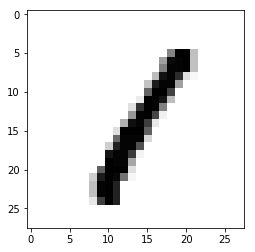

In [17]:
#Displaying  the fourth digit
digit = train_images[3]

import matplotlib.pyplot as plt
plt.imshow(digit, cmap = plt.cm.binary)      #imshow method to show image
plt.show()

In [18]:
#Building the network; layers are data processing modules that we can think as filters of data

from keras import models  #to make sequential type networks
from keras import layers  #to add layers to network

#Adding layers to network; Dense here is used to define fully connected layers. 
#First layer has 512 nodes that will take input of 784 (28*28) pixel values to pass it to next layer.
#Last layer is 10-way softamx layer, it means it will return array of 10 probability scores (summing to 1).

#layers.Dense takes only 2D arrays
#Layers can be interpreted as a function, which takes 2D tensor

network = models.Sequential()   
network.add(layers.Dense(512, activation = 'relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation = "softmax"))

#output = relu(dot(W, input) + b     W-2D tenosr, b- vector
#Explaniation of above layer.Dense function

In [19]:
#RMSProp: Root Mean Square Propagation
#Now compiliing the network
network.compile(optimizer = 'rmsprop',                #Mechanism by which network will update itself
                loss = 'categorical_crossentropy',    #To measure the performance of the network 
                metrics = ['accuracy'])               #Metrics to monitor during testing and training


In [20]:
#Before training the network, we have to reshape the data in a shape that network expects and scaling all values in [0, 1] interval
#from (60000, 28, 28) type unit8  with values [0,255] interval to float array (60000, 28 * 28) with values range between[0, 1]

#Preparing the image data
train_images = train_images.reshape((60000, 28 * 28))  #to change the shape
train_images = train_images.astype('float32') / 255   #to change the data type and values are converted in the range 0 to 1

test_images = test_images.reshape((10000, 28 * 28))  #to change the shape
test_images = test_images.astype('float32') / 255   #to change the data type and values are converted in the range of 0 to1

In [21]:
#We need to categorically encode the labels as all ten-values are different types of categories
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)  #Encoding train_labels
test_labels = to_categorical(test_labels)    #Encoding test_labels

In [22]:
#Training the network with fit method on network with train_images and trian_labels
network.fit(train_images, train_labels, epochs = 10, batch_size = 128)

#loss: over training data
#acc: over training data

Epoch 1/10
60000/60000 [==============================] - 5s 91us/step - loss: 0.2583 - acc: 0.9254
Epoch 2/10
60000/60000 [==============================] - 6s 95us/step - loss: 0.1044 - acc: 0.9693
Epoch 3/10
60000/60000 [==============================] - 5s 89us/step - loss: 0.0693 - acc: 0.9790
Epoch 4/10
60000/60000 [==============================] - 5s 91us/step - loss: 0.0499 - acc: 0.9851
Epoch 5/10
60000/60000 [==============================] - 6s 98us/step - loss: 0.0366 - acc: 0.9890
Epoch 6/10
60000/60000 [==============================] - 6s 92us/step - loss: 0.0287 - acc: 0.9912
Epoch 7/10
60000/60000 [==============================] - 6s 94us/step - loss: 0.0215 - acc: 0.9938
Epoch 8/10
60000/60000 [==============================] - 6s 97us/step - loss: 0.0170 - acc: 0.9950
Epoch 9/10
60000/60000 [==============================] - 6s 92us/step - loss: 0.0123 - acc: 0.9966
Epoch 10/10
60000/60000 [==============================] - 6s 98us/step - loss: 0.0101 - acc: 0.9970

In [23]:
#Network's accuracy on test data: evaluate method is used to test on test dataset 
test_loss, test_acc = network.evaluate(test_images, test_labels)
print("test_acc: ", test_acc)

#Less test-set accuracy is due to overfitting of model

10000/10000 [==============================] - 1s 64us/step
test_acc:  0.9808
